Comenzamos donde dejamos la clase anterior.

## F1 Score:

$$F1 \text{    Score}: \left ( \frac{\frac{1}{\text{precision}}+ \frac{1}{\text{recall}}}{2}    \right )^{-1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} .$$


La pregunta es, habiendo tantos promedios por que se elije el promedio armonico entre precision y recall.

#### Medias Pitagoricas
[Wikipedia](https://en.wikipedia.org/wiki/Pythagorean_means) presenta un buen analisis de este concepto.

Las medias Pitagoricas son 4.
Dados dos reales $a,b$,
1. Media  aritmetica es:

    $$ A = \frac{a+b}{2} .$$

2. Media geometrica
    $$ G = \sqrt{ab} .$$

3. RMS: Root Mean Square (la raiz cuadrada de la media de los cuadrados).

$$ Q = \sqrt{\frac{a^2 + b^2}{2}}.$$

4. Media armonica. El inverso, del promedio de los inversos.


$$H = \frac{1}{\frac{1}{a} + \frac1b } .$$

La media armonica $H$ es la mas pequenha de las 4 medias Pitagoricas.



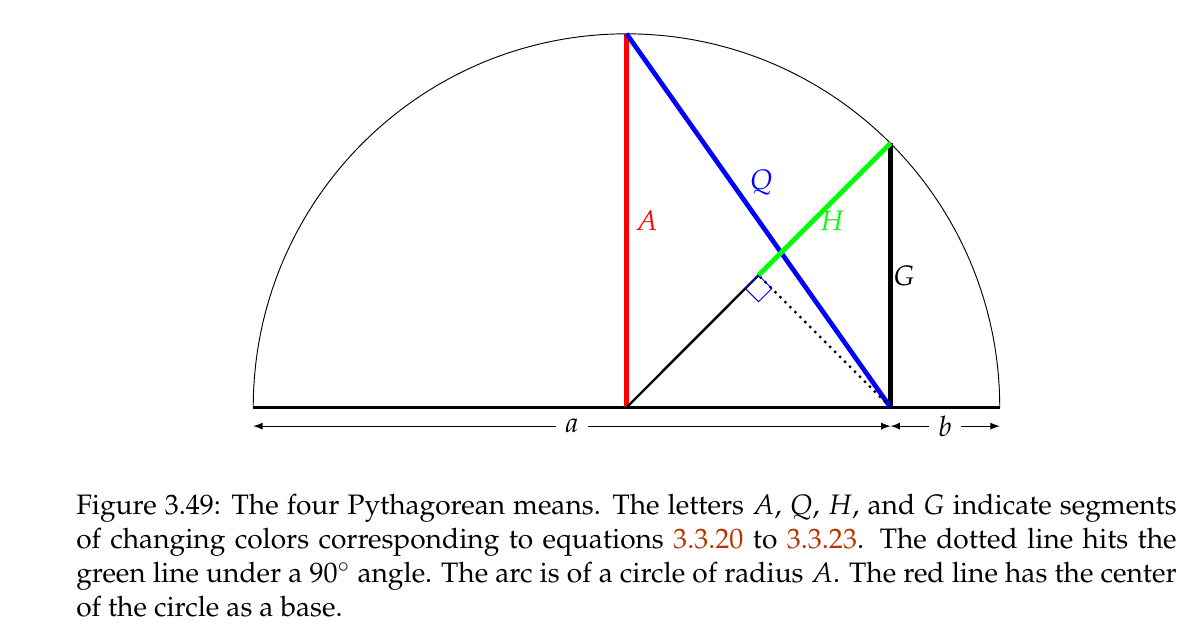

# Actividad: Pruebe las formulas de arriba basandose en la geometrica de la figura (teorema de Pitagoras)

Ademas pruebe que

* Si $a \ne b$, $H < G < A < Q$
* Si $a = b$, $H=G=Q=A$.
* Si una de las dos es cero (por ejemplo b=0), entonces
$A=a/2$, $Q=\sqrt{2} a$, $G=0$, $H=0$.
* Si ambas son 0, $H$ no esta definida, pero a quien le intersa una media de dos 0. Yo diria, en el limite que todas las medias son 0.




## AUC-ROC:
AUC=Area under the curve.
[ROC=Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

El AUC es el area bajo la curva de la curva ROC.

### Historia
El ROC es una curva que explicaremos a continuacion.
La historia se basa en el desarrollo de ingenieros durante la segunda guerra mundial en un radar para detectar objetos enemigos. El radar no era tan preciso, y a veces detectaba aves. Entonces tocaba hacer una evaluacion de la precision del radar.
De senal (objetos del enemigo) contra el ruido (aves).

El ROC es una curva parametrica (recuerden, por ejemplo $(\cos \theta, \sin \theta)$ es un circulo parametrico con el parametro $\theta$.  Lo interesante es que el parametro es el umbral ($\gamma$, threshold). Ahora quien son $(x(\gamma), y(\gamma))$.
Resulta que

$$x=FPR(\gamma) \quad , \quad y=TPR(\gamma) .$$

Vamos a dibujar la curva para un ejemplo.







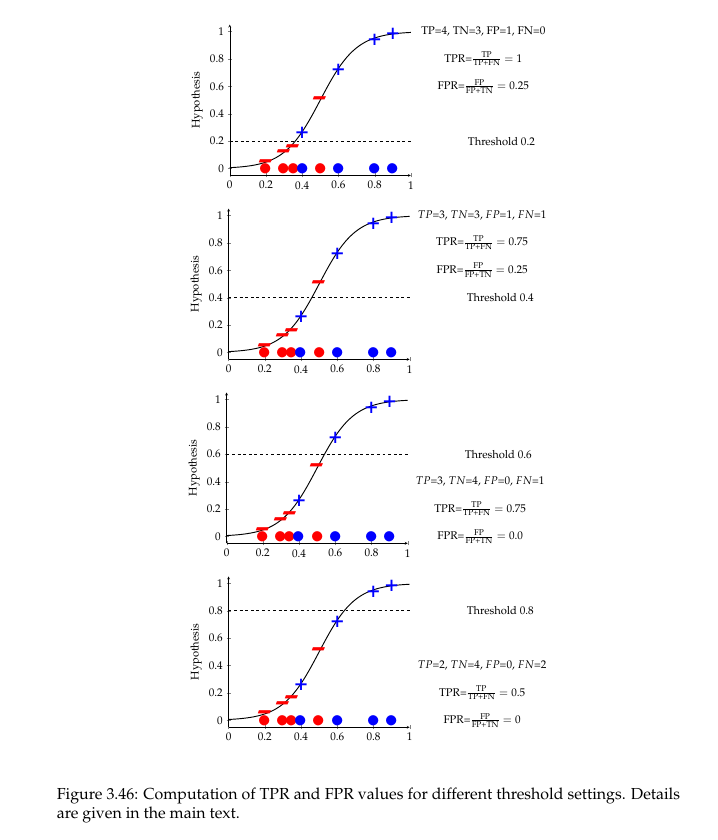

Dos casos extremos

* Que pasa si el umbral $\gamma=0$. En este caso todos los positivos estan por encima, los negativos son 0, y tenemos
TP=4, FP=4, TN=0, FN=0.


\begin{eqnarray}
TPR = \frac{TP}{TP+FN} = 1 \\
FPR = \frac{FP}{FP+TN} = 1 \\
\end{eqnarray}

* Que pasa si el umbral es $\gamma=1$. En este caso
TP=0$, TN=4, FP=0, FN=4

\begin{eqnarray}
TPR = \frac{TP}{TP+FN} = 0 \\
FPR = \frac{FP}{FP+TN} = 0 \\
\end{eqnarray}

Encontramos 6 puntos de la curva: En el orden creciente de $\gamma=0, 0.2, 0.4, 0.6, 0.8, 1.0$

$(1,1), (0.25,1), (0.25, 0.75), (0, 0.75), (0, 0.5), (0,0).$


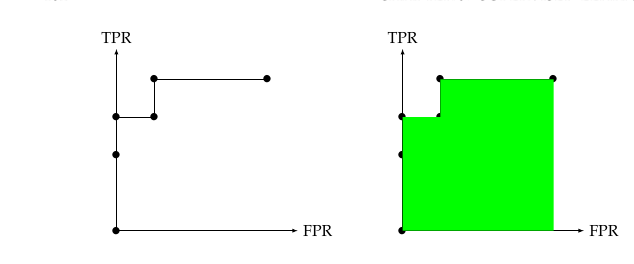

In [ ]:
El AUC se puede calcular facilmente. El area total es 1x1 (un cuadrado de lado 1)
pero toca restarle el cuadraito en la esquina superior izquierda $0.25 \times 0.25$.

El AUC seria

$$ 1 - 0.25^2 = 0.9375 .$$

En la practica se ven Figuras como la siguiente.


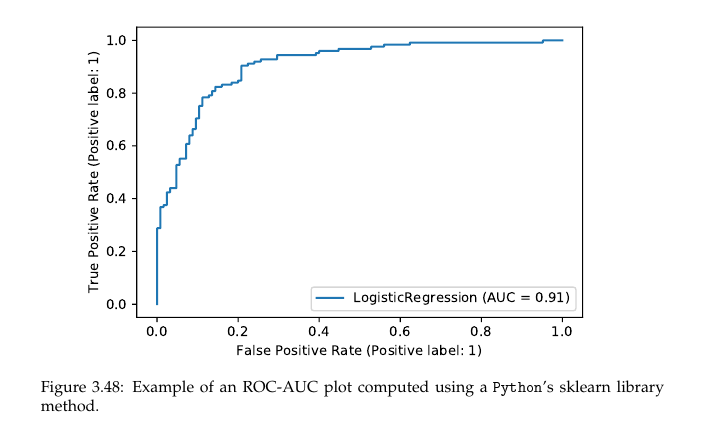

## Matriz de confusion para el caso $K>2$ (multiclase)

En este caso la matriz de confusion es de $K \times K$.
En las filas esta la etiqueta (lo real), en las columnas estan los predichos. Si la etiqueta coincide con lo predicho es bueno y el elemento esta en la diagonal. Si no, no esta en la diagonal.
Por decir algo, tenemos 3 clases, La clase 1 se predice como 2,
entonces que a la fila 1, columna 2 se le suma este conteo. Cada celda de la matriz es un acumulador.

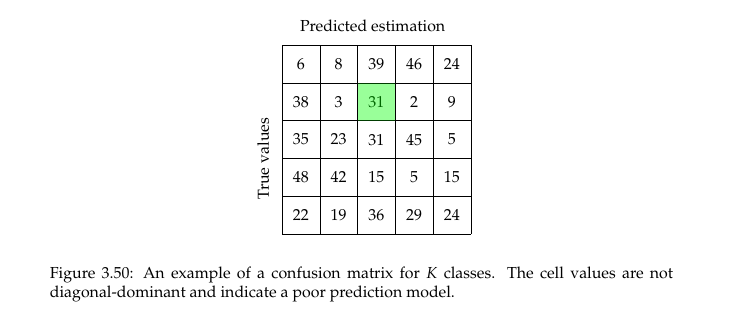

Si la matriz fuera diagonal, la prediccion es perfecta. En el cuadrado verde de la figura (con valor 31) dice que la clase 2 fue predicha 31 veces como clase 3.

La matriz de confusion es

\begin{eqnarray}
\begin{pmatrix}
\ell_{11} & \ell_{12} & \cdots & \ell_{1k} \\
\ell_{21} & \ell_{22} & \cdots & \ell_{2k} \\
\vdots & \vdots &  \ddots & \vdots  \\
\ell_{K1} & \ell_{K2} & \cdots & \ell_{Kk} \\
\end{pmatrix}
\end{eqnarray}

Se puede ver,

Dada una clase $i$
\begin{eqnarray}
TP_i &=& \ell_{ii} \\
FP_i &=& \sum_{l=1}^K \ell_{li} - TP_i \quad, \text{suma por columnas exepto la diagonal} \\
FN_i &=& \sum_{l=1}^K \ell_{il} - TP_i \quad , \quad \text{suma por filas exepto la diagonal}
TN_i = \sum_{l=1}^K \sum_{j=1}^K \ell_{ij} - FP_i - FN_i
\end{eqnarray}

Cual seria el ROC para multiclase?

Se usa el metodo uno-contra-el resto.

# Redes Neuronales Artificiales. ANN: Artificial Neural Networks.
## Itroduccion.
Un punto importante de las redes neuronales es que satisfacen el teorema de

[aproximador universal](https://en.wikipedia.org/wiki/Universal_approximation_theorem#:~:text=Universal%20approximation%20theorems%20imply%20that,such%20a%20construction%20is%20possible.)

Esto me dice, en palabras que con una red neuronal de un determinado numero de capas, y nodos se simular "cualquier"
funcion del espacio $\mathbb{R}^n$ al espacio $\mathbb{R}^m$.

Por que serian necesarias?
Pensemos en resolver un problema de imagenes con regresion logistica. Supongamos que queremos usar una figura de 100x100 pixeles (en gris). Si quiere color necesita 3 canales (al menos), por ejemplo RGB:Red-Green-Blue.

Pensemos en el numero de posibilidades de combinar los pixeles en un modelo lineal Considere que cada pixel es un "feature".
Entonces tenemos $n$ pixeles y los queremos ajustar a un modelo no lineal. (el poder de las redes neuronales esta en los modelos no lineas). El polinomio de orden 2 mas simple con $n$ (features=variables) es


$$\theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n + \theta_{n+1} x_1 x_2 + \cdots + \theta_m x_{n-1} x_n + \theta_{m+1} x_1^2 + \theta_{m+2} x_2^2 + \cdots + \theta_q x_n^2 .$$

La pregunta ahora es cuanto vale $q$?. Necesitariamos $q+1$ terminos. Para poder estimar las dimensiones del problema tenemos que aprender a contar. Las siguientes lineas son del tema de **combinatoria**. En este caso $q+1$ es el numero de formas de combinar $n+1$ objetos $1, x_1, x_2, \cdots, x_n$
en terminos de la forma $1^{i_0} x_1^{i_1} \cdots x_n^{i_n}$
Maxima solo 2 de los exponentes pueden ser 1, de resto los demas deben ser 0. Veamos ejemplos

Vamos a limitar $i_j=0,1,2$.

* El termino que tiene  a $\theta_0$ como coeficiente se obtiene $i_0=2$, $i_1=i_2=\cdots=i_n=0$.

* $x_n$: $i_0=1, i_1=\cdots = i_{n-1}=0$, $i_n=1$.
Asi con los demas.

Para obtener todos terminos necesito la siguiente condicion

$$i_0 + i_1 + \cdots + i_2 = 2 .$$

La pregunta es **de cuantas formas puedo sumar $n+1$ numeros $0,1,2$ de forma que la suma de 2.


$$ i_0 + i_1 + \cdots i_n = 2  \quad, \quad i_j=0,1,2, \quad, \quad j=0,1, \cdots, n.$$

Este es un problema de combinatoria (si hay tiempo les doy una clasesita donde demuestre esta formula)
En el caso $i_0 + i_1 + \cdots + i_n = k$

$$\binom{n+k}{k} = \frac{(n+k)1}{k! n!} = \frac{(n+1)(n+2) \cdots (n+k)}{k!} .$$


Para el caso de nosotros, pensemos en un polinomio en dos variables de segundo orden

$$\theta_0 + \theta_1 x_1 + \theta_2  x_2 + \theta_3 x_1 x_2 + \theta_4 x_1 ^2 + \theta_5 x_2^2 .$$


Verifiquemos la formula con este polinomio.

$$ \binom{n+k}{k} = \binom{4}{2} = \frac{4!}{2! 2!} = \frac{4 \times 3 \times 2}{2 \times 2} =6 .$$

Calcule la dimension de una imagen con $n \times n$ pixeles llevada a un polinomio. El caso cuadratico.


$$\binom{n+2}{2} = \frac{(n+2)!}{n! 2!} = \frac{(n+1)(n+2)}{2} .$$

Regresemos al problema original con $10000$ (100 x 100).


$$\binom{10002}{10000} = \frac{10001 \times 10002}{2} = 50015001.0
.$$











Si quisieramos cubico $k=3$ (se deja como ejercicio) ver que el numero de terminos es:

$$166,766,685,001 .$$
Tenga en cuenta que este es el numero de columas de la matriz y que la matriz, en general tiene mas filas columnas, entonces el tamanho de la matriz en celdas ese del orgen de $10^{22}$ o mas.

Conclusion: Llevar imagenes a polinomios para hacer regresion logistica ( o lineal con polinomios) como en la tarea que entregaron antier no es posible.

En este sentido las redes neuronales son de gran ayuda.

# Proxima clase:
* Historia
* Aplicaciones
* Teoria
    * El modelo de McCulloch-Pitts (los 40s)
    * El perceptron (los 60s)
